<a href="https://colab.research.google.com/github/inamansari21/datascience/blob/main/Clustering_crime_new_assng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
df=pd.read_csv("crime_data.csv")


In [60]:
df.head()


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [61]:
df.shape


(50, 5)

In [62]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [63]:
df.min

<bound method DataFrame.min of         Unnamed: 0  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4      2

In [64]:
df.std()

Murder       4.355510
Assault     83.337661
UrbanPop    14.474763
Rape         9.366385
dtype: float64

In [65]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [66]:
df.kurt()

Murder     -0.827488
Assault    -1.053848
UrbanPop   -0.738360
Rape        0.353964
dtype: float64

In [67]:
df.median()

Murder        7.25
Assault     159.00
UrbanPop     66.00
Rape         20.10
dtype: float64

In [68]:
df.skew()

Murder      0.393956
Assault     0.234410
UrbanPop   -0.226009
Rape        0.801200
dtype: float64

In [69]:
df.columns


Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [70]:
df.shape

(50, 5)

In [71]:
df.dtypes


Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [72]:
df.rename({'Unnamed: 0': 'State'},axis=1,inplace=True)


In [73]:
df.State.unique()


array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [74]:
df.Murder.unique()


array([13.2, 10. ,  8.1,  8.8,  9. ,  7.9,  3.3,  5.9, 15.4, 17.4,  5.3,
        2.6, 10.4,  7.2,  2.2,  6. ,  9.7,  2.1, 11.3,  4.4, 12.1,  2.7,
       16.1,  4.3, 12.2,  7.4, 11.4, 11.1, 13. ,  0.8,  7.3,  6.6,  4.9,
        6.3,  3.4, 14.4,  3.8, 12.7,  3.2,  8.5,  4. ,  5.7,  6.8])

In [75]:
df.Rape.unique()


array([21.2, 44.5, 31. , 19.5, 40.6, 38.7, 11.1, 15.8, 31.9, 25.8, 20.2,
       14.2, 24. , 21. , 11.3, 18. , 16.3, 22.2,  7.8, 27.8, 35.1, 14.9,
       17.1, 28.2, 16.4, 16.5, 46. ,  9.5, 18.8, 32.1, 26.1, 16.1,  7.3,
       21.4, 20. , 29.3,  8.3, 22.5, 12.8, 26.9, 25.5, 22.9, 11.2, 20.7,
       26.2,  9.3, 10.8, 15.6])

In [76]:
df.Assault.unique()


array([236, 263, 294, 190, 276, 204, 110, 238, 335, 211,  46, 120, 249,
       113,  56, 115, 109,  83, 300, 149, 255,  72, 259, 178, 102, 252,
        57, 159, 285, 254, 337,  45, 151, 106, 174, 279,  86, 188, 201,
        48, 156, 145,  81,  53, 161])

In [77]:
df.isnull().sum()


State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [78]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


## Plots and Graphs

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


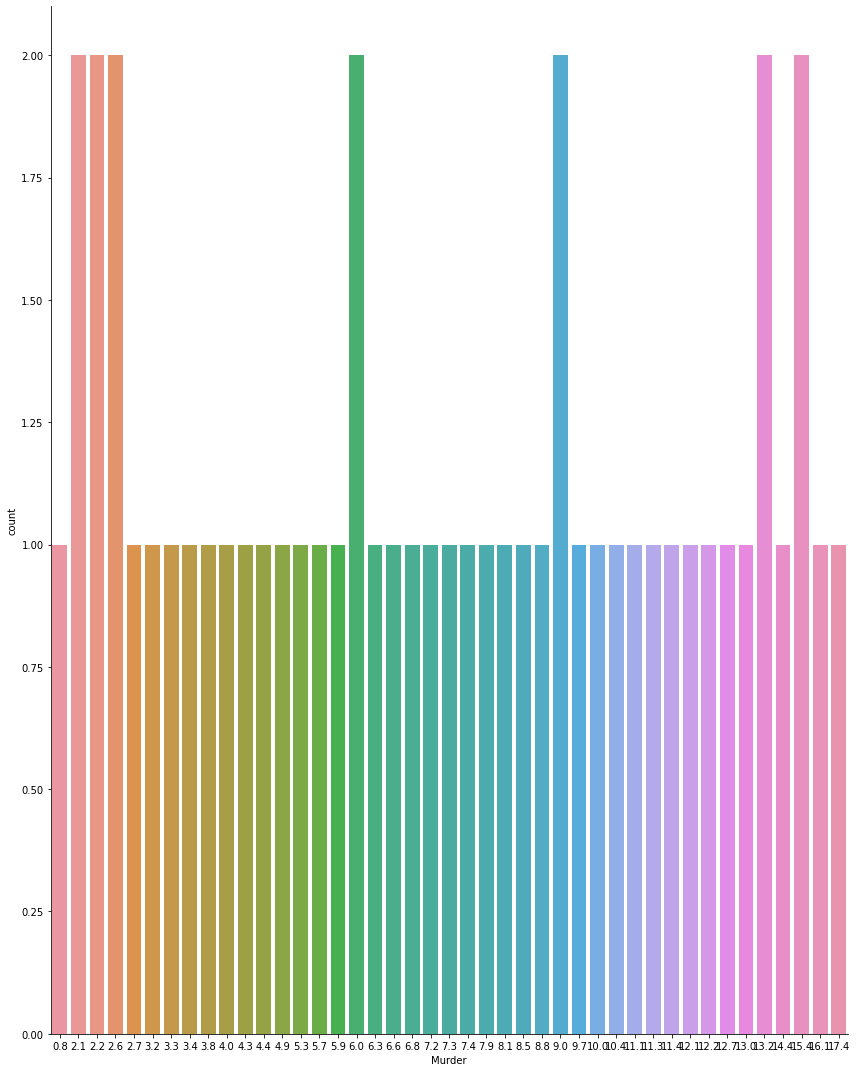

In [79]:
sns.factorplot("Murder",data=df,kind='count',size=15,aspect=.8)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


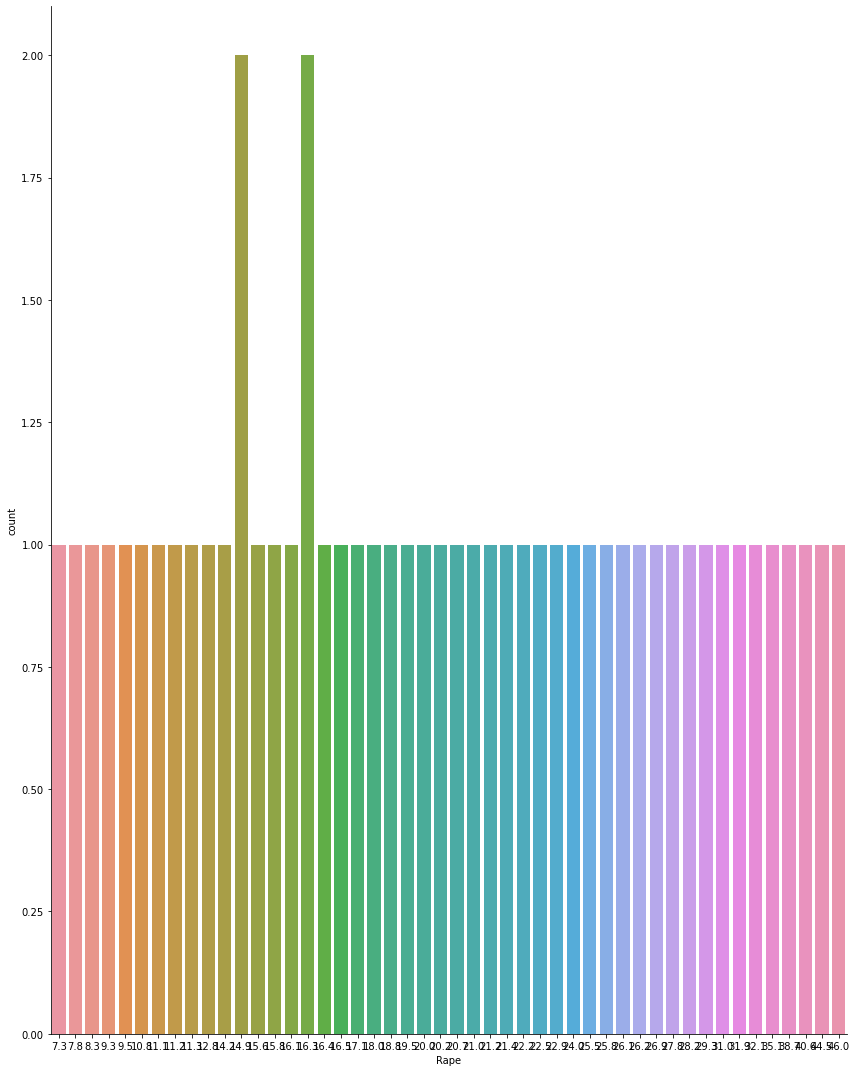

In [80]:
sns.factorplot("Rape",data=df,kind='count',size=15,aspect=.8)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


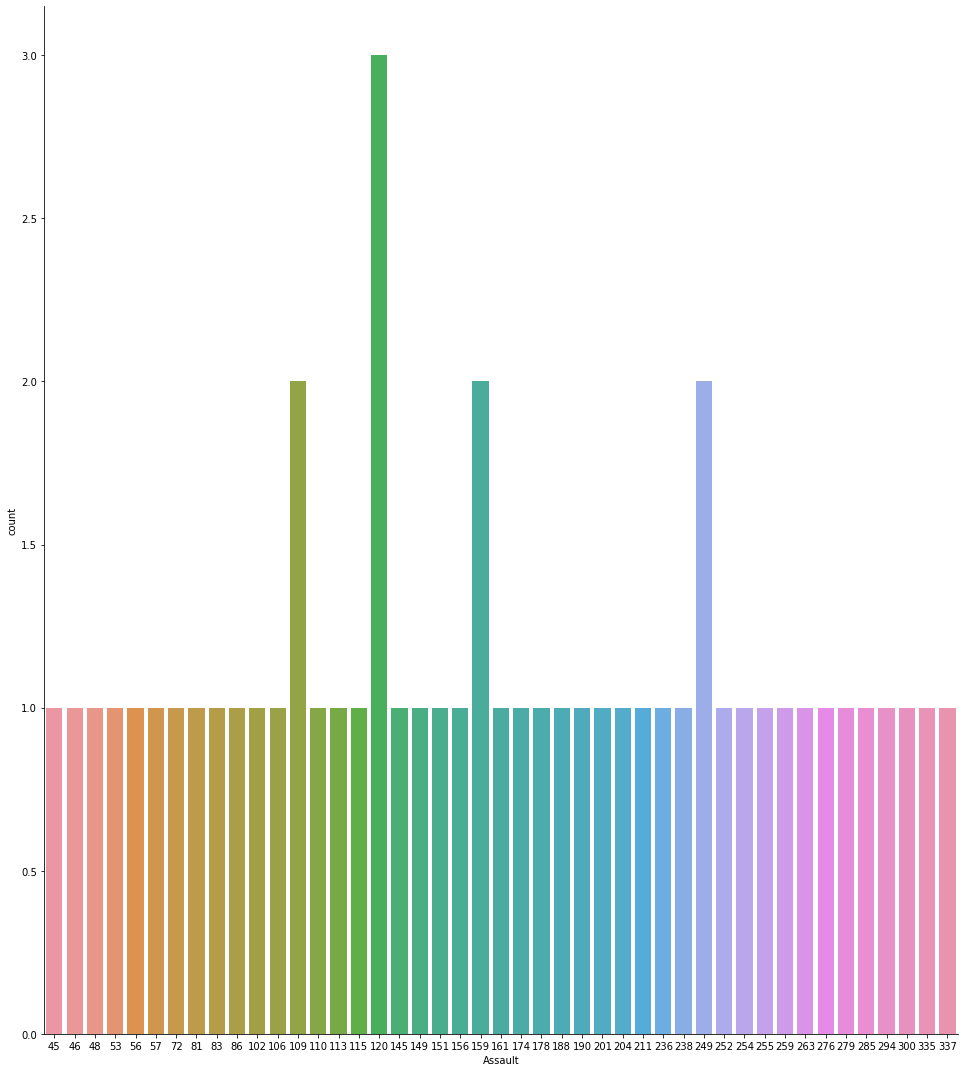

In [81]:
sns.factorplot("Assault",data=df,kind='count',size=15,aspect=.9)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


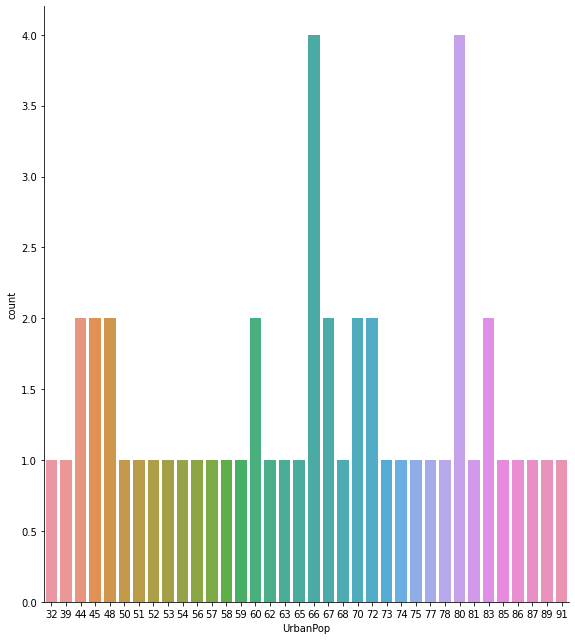

In [82]:
sns.factorplot("UrbanPop",data=df,kind='count',size=9,aspect=.9)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


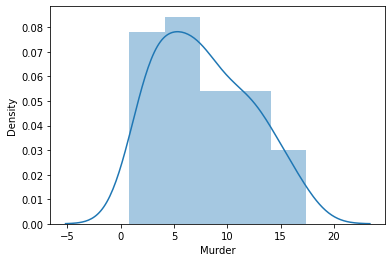

In [83]:
sns.distplot(df['Murder'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


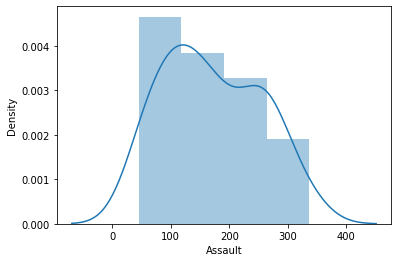

In [84]:
sns.distplot(df['Assault'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


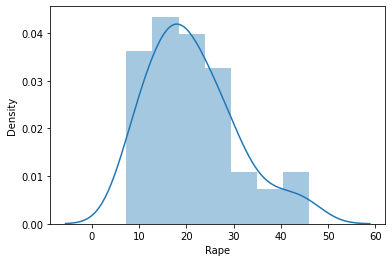

In [85]:
sns.distplot(df['Rape'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


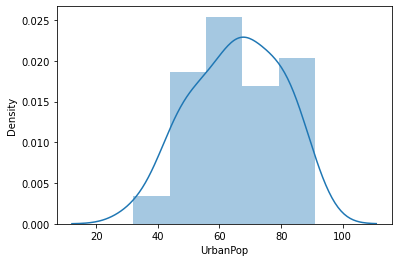

In [86]:
sns.distplot(df['UrbanPop'])


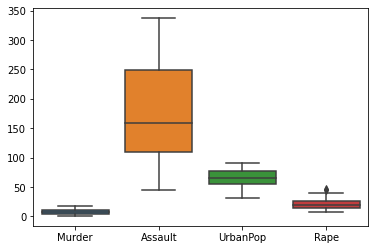

In [87]:
sns.boxplot(data=df)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


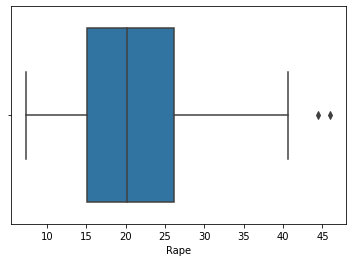

In [88]:
sns.boxplot(df['Rape'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


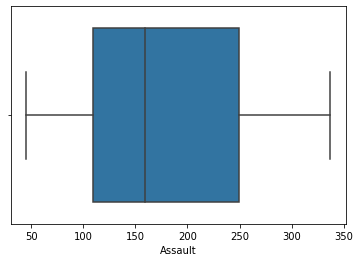

In [89]:
sns.boxplot(df['Assault'])


When We are Dealing With the distances we Need to Normalize or Standardise the data in between 0 and 1

before Normalizing the Data we have an Objet data type feature Called "State" which is actually no need for Now so Remove the State Column in the data set



In [90]:
df.drop(columns='State',axis=1,inplace=True)
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


## Normalization of data

In [91]:
#Normalization
def normal_data(i):
    x= (i-i.min())/(i.max()-i.min())
    return x


In [92]:
df_norm = normal_data(df)


In [93]:
df_norm.head()


,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [94]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering


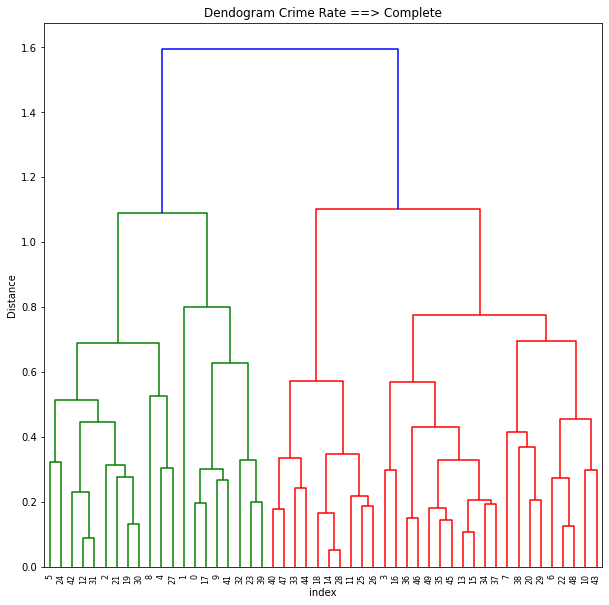

In [95]:
rk = linkage(df_norm,method="complete",metric="euclidean")
plt.figure(figsize=(10,10))
plt.title("Dendogram Crime Rate ==> Complete")
plt.xlabel('index')
plt.ylabel('Distance')
sch.dendrogram(rk,)
plt.show()


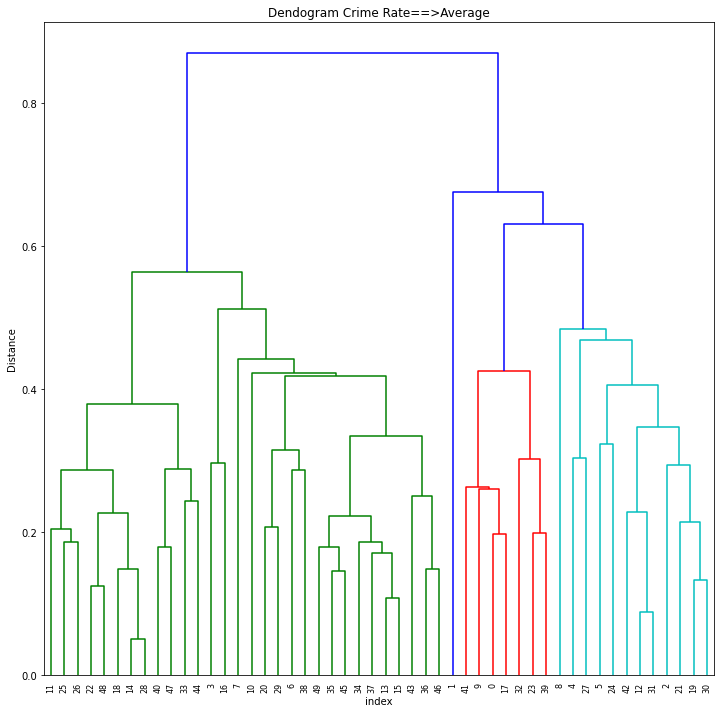

In [96]:
rk = linkage(df_norm, method="average",metric="euclidean")
plt.figure(figsize=(12,12))
plt.title("Dendogram Crime Rate==>Average")
plt.xlabel('index')
plt.ylabel('Distance')
sch.dendrogram(rk,)
plt.show()


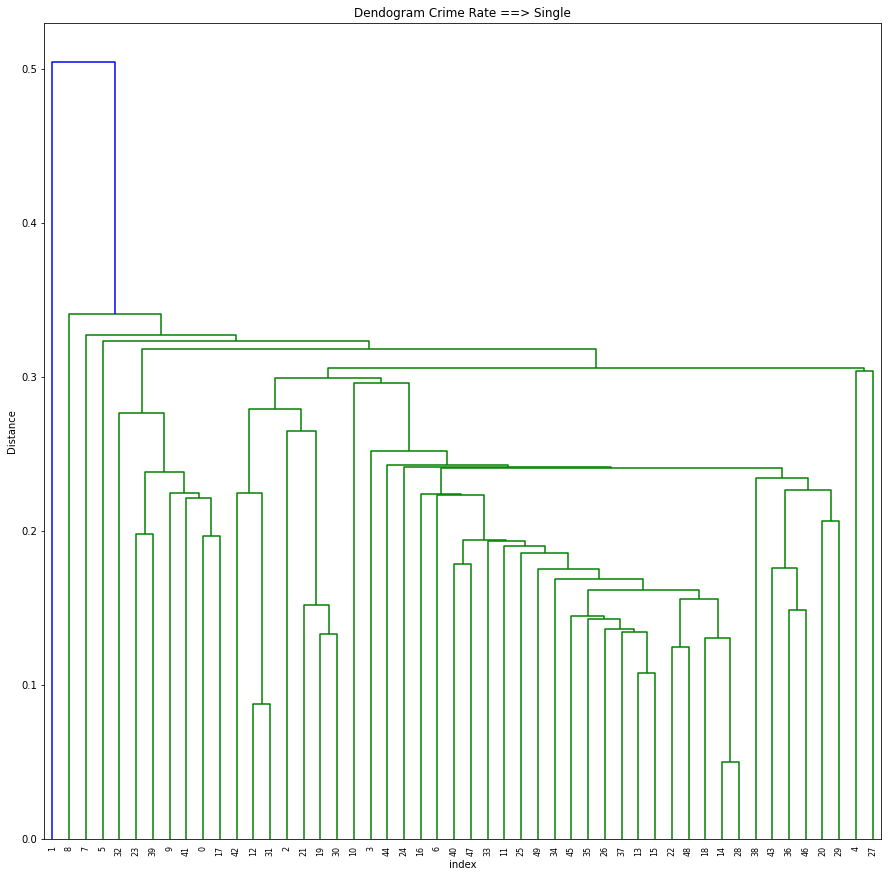

In [97]:
rk = linkage(df_norm, method="single",metric="euclidean")
plt.figure(figsize=(15,15))
plt.title("Dendogram Crime Rate ==> Single")
plt.xlabel('index')
plt.ylabel('Distance')
sch.dendrogram(rk,)
plt.show()


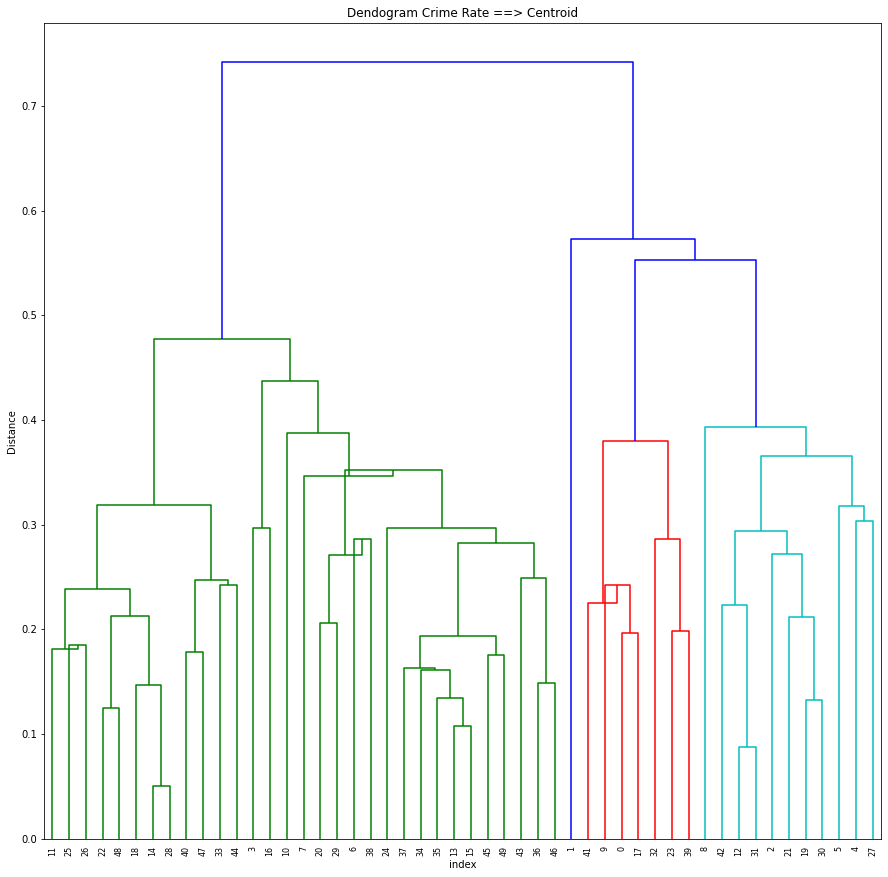

In [98]:
rk = linkage(df_norm, method="centroid",metric="euclidean")
plt.figure(figsize=(15,15))
plt.title("Dendogram Crime Rate ==> Centroid")
plt.xlabel('index')
plt.ylabel('Distance')
sch.dendrogram(rk)
plt.show()


In [99]:
from sklearn.cluster import AgglomerativeClustering
h_clust=AgglomerativeClustering(n_clusters=5,linkage='complete',affinity = 'euclidean').fit(df_norm)
cluster_labels=pd.Series(h_clust.labels_)
df['Clusters']= cluster_labels


In [100]:
df.iloc[:,0:].groupby(df['Clusters']).mean()


,Murder,Assault,UrbanPop,Rape,Clusters
Clusters,,,,,
0,5.715000,132.300000,70.800000,18.100000,0
1,10.883333,256.916667,78.333333,32.250000,1
2,3.180000,78.700000,49.300000,11.630000,2
3,14.671429,251.285714,54.285714,21.685714,3
4,10.000000,263.000000,48.000000,44.500000,4


## standard scaler

In [101]:
df.iloc[:,:-1]


,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [102]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
std_df=pd.DataFrame(scaler.fit_transform(df.iloc[:,:-1]))
std_df


,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


In [103]:
std_df.head()


,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [104]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering


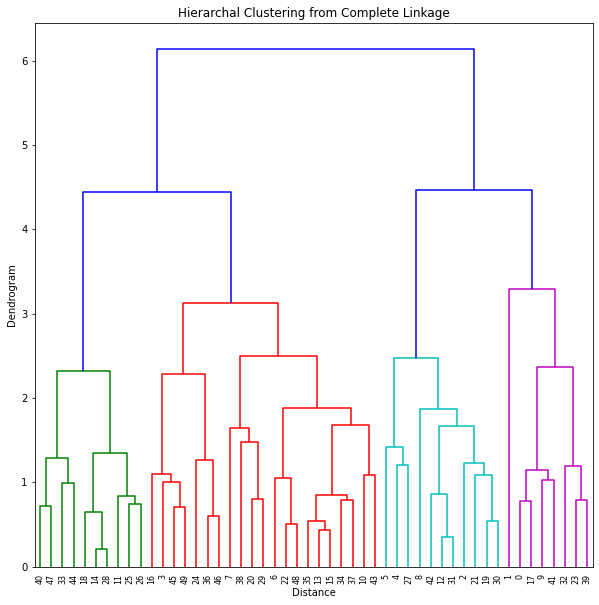

In [105]:
std=linkage(std_df,method="complete",metric='euclidean')
plt.figure(figsize=(10,10))
plt.title("Hierarchal Clustering from Complete Linkage")
plt.xlabel('Distance')
plt.ylabel('Dendrogram')
sch.dendrogram(std)
plt.show()


In [106]:
from sklearn.cluster import AgglomerativeClustering
std_rk=AgglomerativeClustering(n_clusters=5,linkage='complete',affinity='euclidean').fit(std_df)
cluster_labelss=pd.Series(std_rk.labels_)
cluster_labelss
std_df['Clusters']=cluster_labelss


In [107]:
std_df


,0,1,2,3,Clusters
0,1.255179,0.790787,-0.526195,-0.003451,1
1,0.513019,1.118060,-1.224067,2.509424,4
2,0.072361,1.493817,1.009122,1.053466,2
3,0.234708,0.233212,-1.084492,-0.186794,0
4,0.281093,1.275635,1.776781,2.088814,2
5,0.025976,0.402909,0.869548,1.883901,2
6,-1.040880,-0.736484,0.799761,-1.092723,0
7,-0.437875,0.815030,0.450825,-0.585834,0
8,1.765415,1.990786,1.009122,1.150530,2
9,2.229265,0.487757,-0.386621,0.492653,1


In [108]:
std_df.iloc[:,0:].groupby(std_df['Clusters']).mean()


,0,1,2,3,Clusters
Clusters,,,,,
0,-0.444501,-0.439803,0.364422,-0.285912,0
1,1.596441,0.976068,-0.785405,0.048933,1
2,0.757594,1.131283,0.945679,1.227985,2
3,-1.068711,-1.115878,-1.133343,-1.035563,3
4,0.513019,1.118060,-1.224067,2.509424,4


In [109]:
data=std_df[(std_df.Clusters == 1)]
data


,0,1,2,3,Clusters
0,1.255179,0.790787,-0.526195,-0.003451,1
9,2.229265,0.487757,-0.386621,0.492653,1
17,1.765415,0.948363,0.032102,0.104398,1
23,1.927762,1.069575,-1.503215,-0.445631,1
32,1.208794,2.015028,-1.433428,-0.553480,1
39,1.533490,1.311999,-1.224067,0.136752,1
41,1.255179,0.208970,-0.456408,0.611287,1


In [110]:
data=std_df[(std_df.Clusters == 2)]
data


,0,1,2,3,Clusters
2,0.072361,1.493817,1.009122,1.053466,2
4,0.281093,1.275635,1.776781,2.088814,2
5,0.025976,0.402909,0.869548,1.883901,2
8,1.765415,1.990786,1.009122,1.150530,2
12,0.605789,0.948363,1.218484,0.298525,2
19,0.814521,1.566544,0.101889,0.708350,2
21,1.000062,1.021090,0.590399,1.495646,2
27,1.023254,0.984726,1.078909,2.671197,2
30,0.837714,1.384726,0.311251,1.172100,2
31,0.768136,1.008969,1.427845,0.525008,2


In [111]:
data=std_df[(std_df.Clusters == 3)]
data


,0,1,2,3,Clusters
11,-1.203228,-0.615272,-0.805344,-0.758392,3
14,-1.295998,-1.391029,-0.595982,-1.071153,3
18,-1.319191,-1.063757,-1.014705,-1.448624,3
25,-0.414682,-0.748605,-0.875131,-0.521125,3
26,-0.808955,-0.833454,-0.247047,-0.510340,3
28,-1.319191,-1.378908,-0.665769,-1.265281,3
33,-1.620693,-1.524362,-1.503215,-1.502548,3
40,-0.924918,-1.027393,-1.433428,-0.909380,3
44,-1.295998,-1.487999,-2.340661,-1.081938,3
47,-0.484260,-1.087999,-1.852151,-1.286851,3


In [112]:
data=std_df[(std_df.Clusters == 4)]
data


,0,1,2,3,Clusters
1,0.513019,1.11806,-1.224067,2.509424,4


In [113]:
data=std_df[(std_df.Clusters == 0)]
data


,0,1,2,3,Clusters
3,0.234708,0.233212,-1.084492,-0.186794,0
6,-1.040880,-0.736484,0.799761,-1.092723,0
7,-0.437875,0.815030,0.450825,-0.585834,0
10,-0.577030,-1.512241,1.218484,-0.111300,0
13,-0.136372,-0.700121,-0.037685,-0.025021,0
15,-0.414682,-0.675878,0.032102,-0.348567,0
16,0.443441,-0.748605,-0.944918,-0.531910,0
20,-0.785763,-0.263757,1.358058,-0.531910,0
22,-1.180036,-1.197090,0.032102,-0.682898,0
24,0.281093,0.087757,0.311251,0.751490,0
